<a href="https://colab.research.google.com/github/Sheetal25-pixel/end-to-end/blob/main/IPL_Score_Prediction_using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: First, let’s import all the necessary libraries:**bold text**

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras
import tensorflow as tf

Step 2: Loading the dataset!**bold text**

In [41]:
ipl = pd.read_csv('ipl_data.csv')
ipl.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


Step 3: Data Pre-processing

3.1 Dropping unimportant **features**

In [42]:
#Dropping certain features
df = ipl.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'], axis =1)

3.2 Further Pre-**Processing**

In [43]:
X = df.drop(['total'], axis =1)
y = df['total']

3.3 Label **Encoding**

In [44]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object for each categorical feature
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

# Fit and transform the categorical features with label encoding
X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])

3.4 Train Test **Split**

In [45]:
# Train test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

3.5 Feature **Scaling**

In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Step 4: Define the Neural **Network**

In [47]:
# Define the neural network model
model = keras.Sequential([
    keras.layers.Input( shape=(X_train_scaled.shape[1],)),  # Input layer
    keras.layers.Dense(512, activation='relu'),  # Hidden layer with 512 units and ReLU activation
    keras.layers.Dense(216, activation='relu'),  # Hidden layer with 216 units and ReLU activation
    keras.layers.Dense(1, activation='linear')  # Output layer with linear activation for regression
])

# Compile the model with Huber loss
huber_loss = tf.keras.losses.Huber(delta=1.0)  # You can adjust the 'delta' parameter as needed
model.compile(optimizer='adam', loss=huber_loss)  # Use Huber loss for regression

Step 5: Model **Training**

In [48]:
# Train the model for exactly 5 epochs
model.fit(X_train_scaled, y_train, epochs=5, batch_size=64, validation_data=(X_test_scaled, y_test))

Epoch 1/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 55.8177 - val_loss: 22.1224
Epoch 2/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 22.3415 - val_loss: 22.2288
Epoch 3/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 22.2843 - val_loss: 21.9444
Epoch 4/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 22.1242 - val_loss: 22.2380
Epoch 5/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 22.1945 - val_loss: 21.8858
Epoch 6/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 22.0136 - val_loss: 21.9794
Epoch 7/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 22.0088 - val_loss: 21.8513
Epoch 8/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 22.2856 - val_loss: 22.0906
Epoch 9/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 22.1059 - val_loss: 21.7802
Epoch 10/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 22.1430 - val_loss: 21.7971


<Axes: >

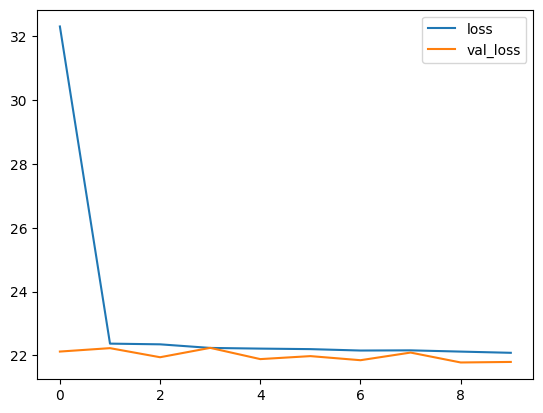

In [49]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

Step 6: Model **Evaluation**

In [50]:
# Make predictions
predictions = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


22.289022795031713

In [51]:
import pandas as pd

results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()})
print(results.head(10))


       Actual   Predicted
12590     134  153.307907
74893     195  163.414017
56763     183  166.453247
19428     183  163.797455
30216     193  169.632172
37836     136  156.144836
34538     186  166.592712
71880     176  161.867981
50453     148  162.720642
69490     135  150.187378


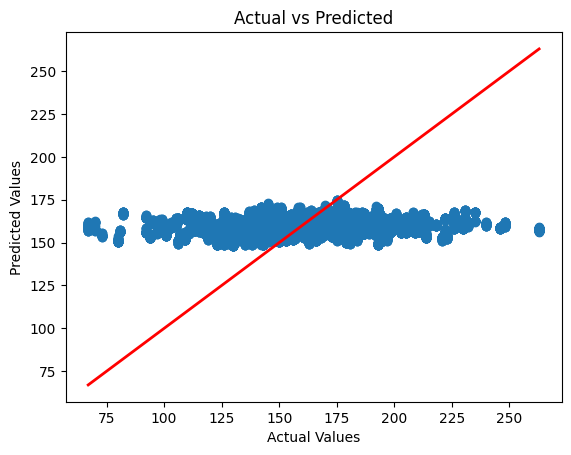

In [52]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Diagonal line
plt.show()


   mid        date                  venue               bat_team  \
0    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
1    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
2    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
3    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
4    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   

                     bowl_team      batsman   bowler  runs  wickets  overs  \
0  Royal Challengers Bangalore   SC Ganguly  P Kumar     1        0    0.1   
1  Royal Challengers Bangalore  BB McCullum  P Kumar     1        0    0.2   
2  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.2   
3  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.3   
4  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.4   

   runs_last_5  wickets_last_5  striker  non-striker  total  
0            1               0        0            0    222 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
832/832 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 2583.1294 - val_loss: 126.0078
Epoch 2/5
832/832 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 88.3688 - val_loss: 56.4968
Epoch 3/5
832/832 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 41.4640 - val_loss: 39.2194
Epoch 4/5
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 29.6385 - val_loss: 31.1439
Epoch 5/5
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 23.0772 - val_loss: 29.1694
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Mean Absolute Error: 3.7848184329592143


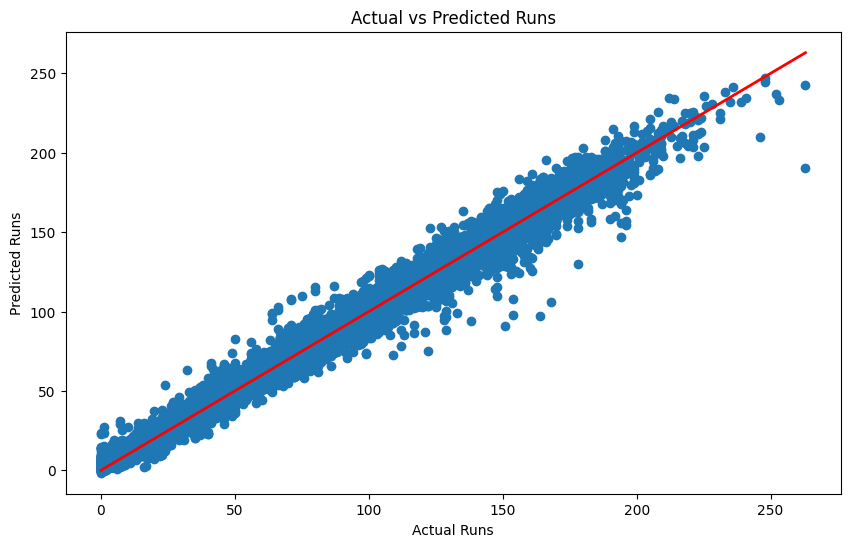

       Actual   Predicted
12590       1    3.981748
74893     131  123.728203
56763      36   42.762493
19428     104  105.389999
30216     103  110.889778
37836      39   28.585915
34538     121  126.280136
71880      24   26.704180
50453      41   41.039829
69490       3    6.318559


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('ipl_data.csv')

# Display the first few rows of the dataset
print(data.head())

# Data Preprocessing
# Assuming we want to predict 'runs' based on other features.
# Select features and target variable
X = data.drop(['runs'], axis=1)  # Replace 'runs' with your target column if different
y = data['runs']  # Target variable

# Convert categorical columns to dummy variables if necessary
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model for 5 epochs (you can adjust this)
model.fit(X_train_scaled, y_train, epochs=5, batch_size=64, validation_data=(X_test_scaled, y_test))

# Make predictions
predictions = model.predict(X_test_scaled)

# Evaluate the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

# Visualize Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Runs')
plt.ylabel('Predicted Runs')
plt.title('Actual vs Predicted Runs')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Diagonal line for reference
plt.show()

# Optionally: Print some sample results for inspection
results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()})
print(results.head(10))


In [55]:
# Make predictions
predictions = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)

713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


3.7848184329592143

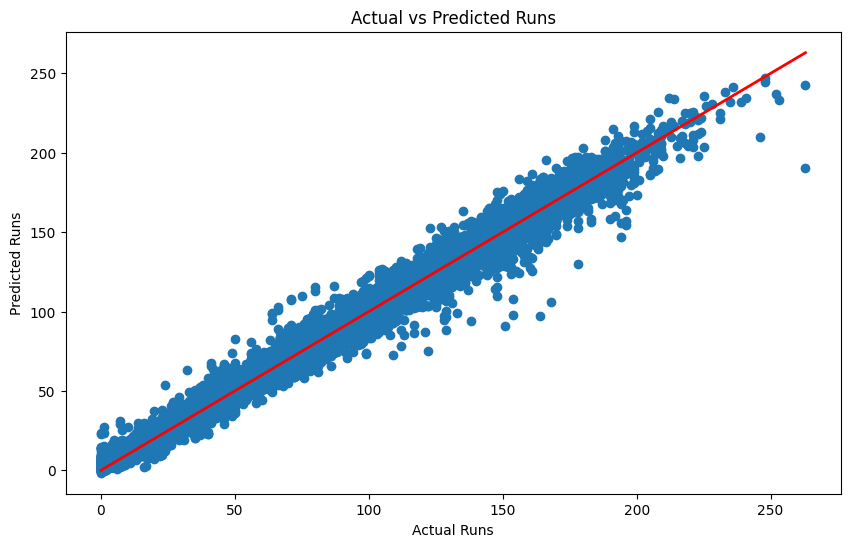

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Runs')
plt.ylabel('Predicted Runs')
plt.title('Actual vs Predicted Runs')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Diagonal line for reference
plt.show()


Step 7: Let’s create an Interactive **Widget**

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings("ignore")

venue = widgets.Dropdown(options=df['venue'].unique().tolist(),description='Select Venue:')
batting_team = widgets.Dropdown(options =df['bat_team'].unique().tolist(),  description='Select Batting Team:')
bowling_team = widgets.Dropdown(options=df['bowl_team'].unique().tolist(),  description='Select Batting Team:')
striker = widgets.Dropdown(options=df['batsman'].unique().tolist(), description='Select Striker:')
bowler = widgets.Dropdown(options=df['bowler'].unique().tolist(), description='Select Bowler:')

predict_button = widgets.Button(description="Predict Score")

def predict_score(b):
    with output:
        clear_output()  # Clear the previous output


        # Decode the encoded values back to their original values
        decoded_venue = venue_encoder.transform([venue.value])
        decoded_batting_team = batting_team_encoder.transform([batting_team.value])
        decoded_bowling_team = bowling_team_encoder.transform([bowling_team.value])
        decoded_striker = striker_encoder.transform([striker.value])
        decoded_bowler = bowler_encoder.transform([bowler.value])


        input = np.array([decoded_venue,  decoded_batting_team, decoded_bowling_team,decoded_striker, decoded_bowler])
        input = input.reshape(1,5)
        input = scaler.transform(input)
        #print(input)
        predicted_score = model.predict(input)
        predicted_score = int(predicted_score[0,0])

        print(predicted_score)

In [60]:
def predict_score(b):
    with output:
        clear_output()  # Clear previous output

        # Encode selected values
        decoded_venue = venue_encoder.transform([venue.value])
        decoded_batting_team = batting_team_encoder.transform([batting_team.value])
        decoded_bowling_team = bowling_team_encoder.transform([bowling_team.value])
        decoded_striker = striker_encoder.transform([striker.value])
        decoded_bowler = bowler_encoder.transform([bowler.value])

        # Create a full input array with all necessary features
        # Initialize an array with zeros for all features
        input_data = np.zeros((1, 1247))  # Adjust this number based on your actual feature count

        # Fill in the encoded values at their respective indices
        input_data[0][0] = decoded_venue
        input_data[0][1] = decoded_batting_team
        input_data[0][2] = decoded_bowling_team
        input_data[0][3] = decoded_striker
        input_data[0][4] = decoded_bowler

        # Scale the complete input data
        input_data_scaled = scaler.transform(input_data)

        # Make prediction
        predicted_score = model.predict(input_data_scaled)
        predicted_score = int(predicted_score[0, 0])  # Convert to integer

        print(f'Predicted Score: {predicted_score}')


In [61]:
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)

Dropdown(description='Select Venue:', index=1, options=('M Chinnaswamy Stadium', 'Punjab Cricket Association S…

Dropdown(description='Select Batting Team:', index=1, options=('Kolkata Knight Riders', 'Chennai Super Kings',…

Dropdown(description='Select Bowling Team:', index=1, options=('Royal Challengers Bangalore', 'Kings XI Punjab…

Dropdown(description='Select Striker:', index=8, options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Husse…

Dropdown(description='Select Bowler:', index=9, options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Jo…

Button(description='Predict Score', style=ButtonStyle())

Output()